<br>

## Matplotlib Tutorial: Gridspec

<img width="60%" class="imgright" src="../images/gridspec_with_images.webp" srcset="../images/gridspec_with_images_800w.webp 800w,../images/gridspec_with_images_700w.webp 700w,../images/gridspec_with_images_600w.webp 600w,../images/gridspec_with_images_500w.webp 500w,../images/gridspec_with_images_400w.webp 400w,../images/gridspec_with_images_350w.webp 350w,../images/gridspec_with_images_300w.webp 300w" alt="matplotlib gridspec with images" />

We have seen in the last chapter of our Python tutorial on Matplotlib how to create a figure with multiple axis or subplot. To create such figures we used the ```subplots``` function. We will demonstrate in this chapter how the submodule of matplotlib ```gridspec``` can be used to specify the location of the subplots in a figure. In other words, it specifies the location of the subplots in a given ```GridSpec```. ```GridSpec``` provides us with additional control over the placements of subplots, also the the margins and the spacings between the individual subplots. It also allows us the creation of axes which can spread over multiple grid areas.

We create a figure and four containing axes in the following code. We have covered this in our previous chapter.

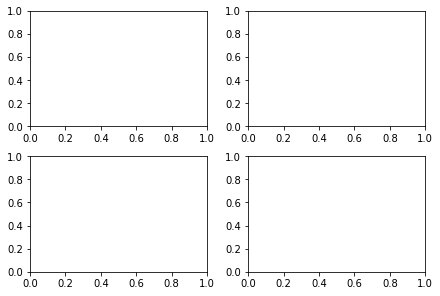

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

We will create the previous example now by using GridSpec. At first, we have to create a figure object and after this a GridSpec object. We pass the figure object to the parameter ```figure``` of ```GridSpec```. The axes are created by using ```add_subplot```. The elements of the gridspec are accessed the same way as numpy arrays.



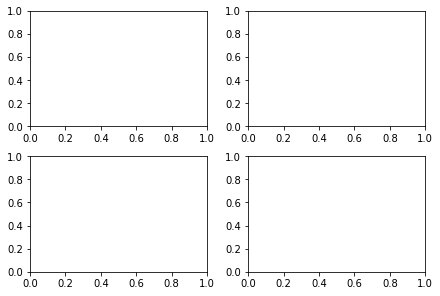

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])

The above example is not a good usecase of ```GridSpec```. It does not give us any benefit over the use of ```subplots```. In principle, it is only more complicated in this case.

The importance and power of Gridspec unfolds, if we create subplots that span
rows and columns.  

We show this in the following example:

Text(0.5, 1.0, 'gs[-1, -2]')

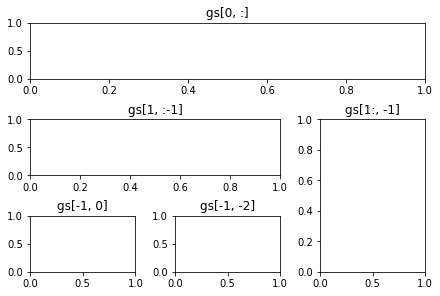

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title('gs[0, :]')
ax2 = fig.add_subplot(gs[1, :-1])
ax2.set_title('gs[1, :-1]')
ax3 = fig.add_subplot(gs[1:, -1])
ax3.set_title('gs[1:, -1]')
ax4 = fig.add_subplot(gs[-1, 0])
ax4.set_title('gs[-1, 0]')
ax5 = fig.add_subplot(gs[-1, -2])
ax5.set_title('gs[-1, -2]')

:mod:`~matplotlib.gridspec` is also indispensable for creating subplots
of different widths via a couple of methods.

The method shown here is similar to the one above and initializes a
uniform grid specification,
and then uses numpy indexing and slices to allocate multiple
"cells" for a given subplot.



Text(0.5, 0.5, 'GridSpec[1:, 1:]')

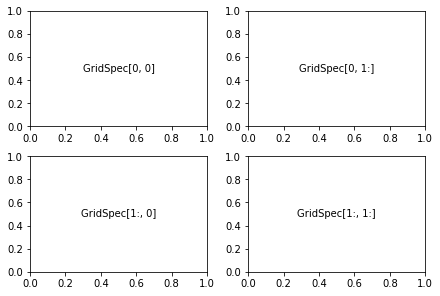

In [10]:
fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=2)
optional_params = dict(xy=(0.5, 0.5), 
                       xycoords='axes fraction',
                       va='center', 
                       ha='center')

ax = fig.add_subplot(spec[0, 0])
ax.annotate('GridSpec[0, 0]', **optional_params)
fig.add_subplot(spec[0, 1]).annotate('GridSpec[0, 1:]', **optional_params)
fig.add_subplot(spec[1, 0]).annotate('GridSpec[1:, 0]', **optional_params)
fig.add_subplot(spec[1, 1]).annotate('GridSpec[1:, 1:]', **optional_params)

Another option is to use the ``width_ratios`` and ``height_ratios``
parameters. These keyword arguments are lists of numbers.
Note that absolute values are meaningless, only their relative ratios
matter. That means that ``width_ratios=[2, 4, 8]`` is equivalent to
``width_ratios=[1, 2, 4]`` within equally wide figures.
For the sake of demonstration, we'll blindly create the axes within
``for`` loops since we won't need them later.



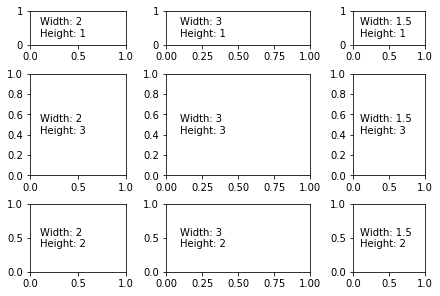

In [7]:
fig5 = plt.figure(constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

GridSpec using SubplotSpec
==========================

You can create GridSpec from the :class:`~matplotlib.gridspec.SubplotSpec`,
in which case its layout parameters are set to that of the location of
the given SubplotSpec.

Note this is also available from the more verbose
`.gridspec.GridSpecFromSubplotSpec`.



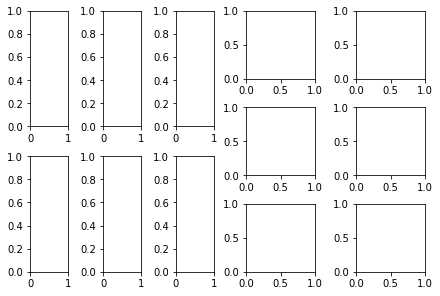

In [12]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 3)
gs01 = gs0[1].subgridspec(3, 2)

for a in range(2):
    for b in range(3):
        fig10.add_subplot(gs00[a, b])
        fig10.add_subplot(gs01[b, a])

### Psd Demo

Plotting Power Spectral Density (PSD) in Matplotlib.

The PSD is a common plot in the field of signal processing. NumPy has many useful libraries for computing a PSD. Below we demo a few examples of how this can be accomplished and visualized with Matplotlib.

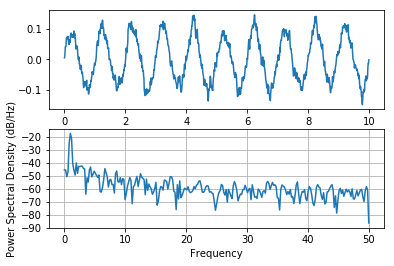

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(42)

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

plt.subplot(211)
plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 512, 1 / dt)

plt.show()

This type of flexible grid alignment has a wide range of uses. I most often use it when creating multi-axes histogram plots like the ones shown here:

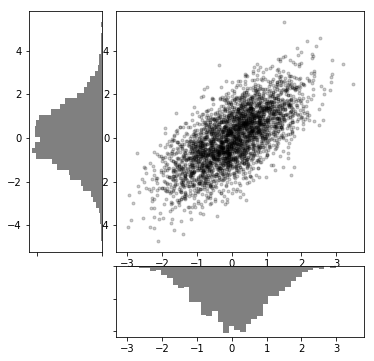

In [16]:


# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

